In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Train(1).csv to SalaryData_Train(1).csv


In [ ]:
train=pd.read_csv("SalaryData_Train(1).csv")
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1).csv


In [ ]:
test=pd.read_csv("SalaryData_Test(1).csv")
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


EDA

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


<Axes: xlabel='workclass', ylabel='count'>

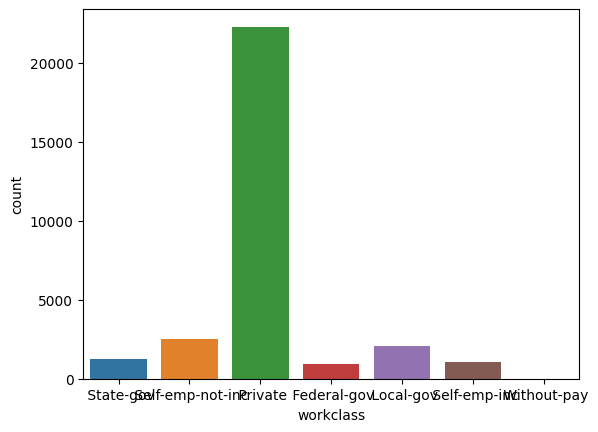

In [ ]:
sns.countplot(x='workclass',data=train)

<Axes: xlabel='workclass', ylabel='count'>

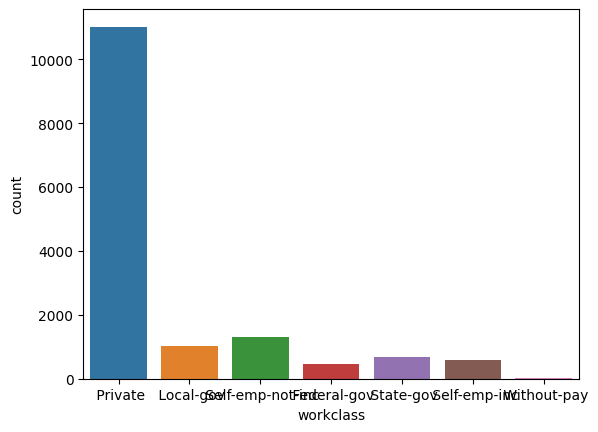

In [ ]:
sns.countplot(x='workclass',data=test)

<Axes: xlabel='Salary', ylabel='count'>

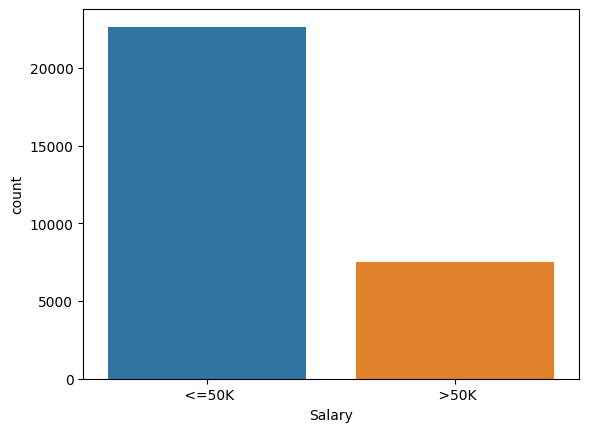

In [ ]:
sns.countplot(x='Salary',data=train)

<Axes: xlabel='Salary', ylabel='count'>

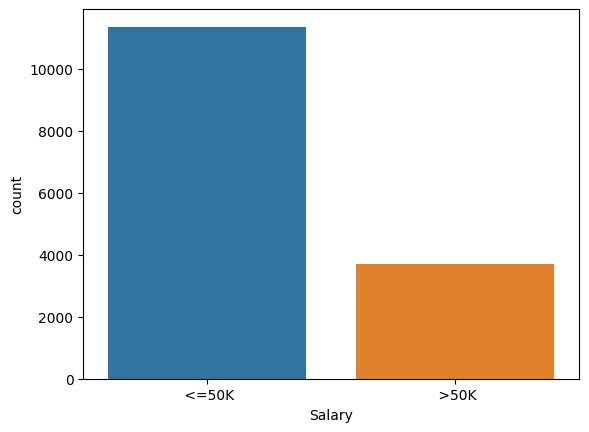

In [ ]:
sns.countplot(x='Salary',data=test)

<Axes: xlabel='education', ylabel='count'>

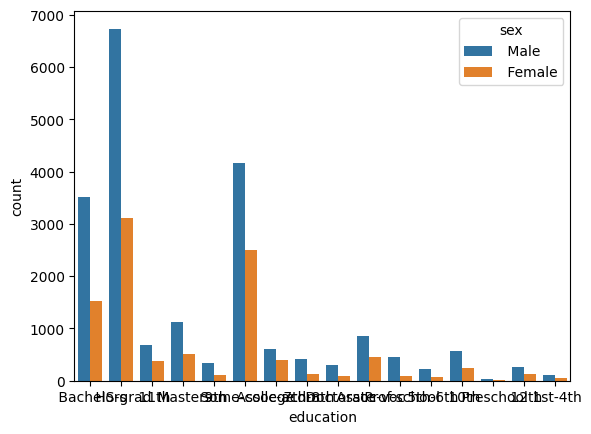

In [ ]:
sns.countplot(x='education',hue='sex',data=train)

<Axes: xlabel='Salary', ylabel='count'>

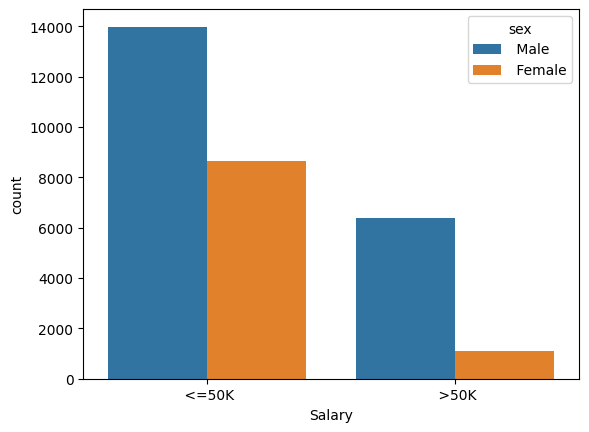

In [ ]:
sns.countplot(x='Salary',hue='sex',data=train)

<Axes: xlabel='occupation', ylabel='workclass'>

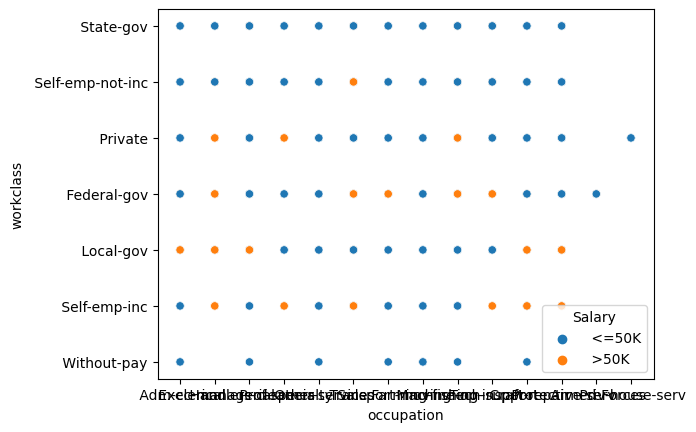

In [ ]:
sns.scatterplot(x='occupation',y='workclass',hue='Salary',data=train)

<Axes: xlabel='education'>

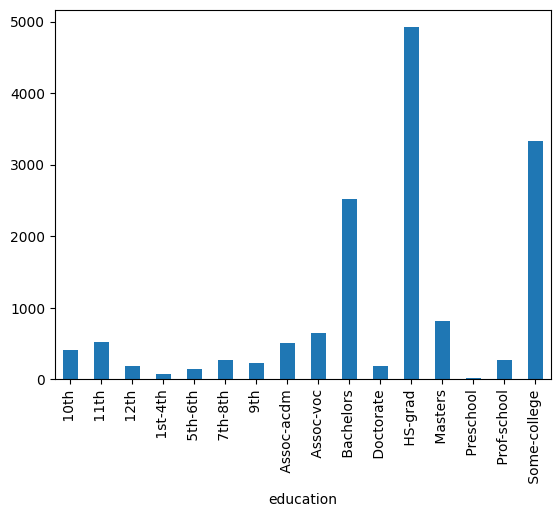

In [ ]:
pd.crosstab(train['Salary'],train['education']).mean().plot(kind='bar')

<Axes: xlabel='sex'>

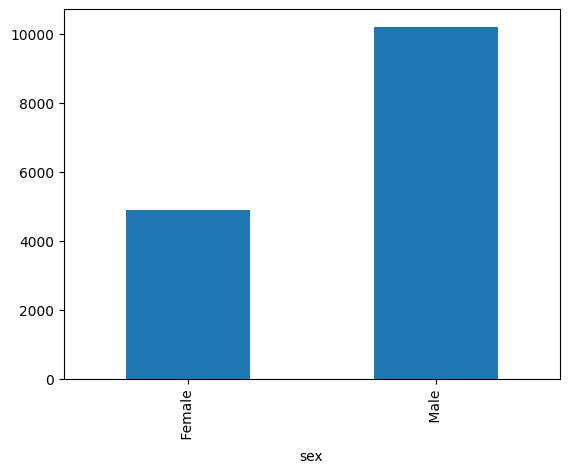

In [ ]:
pd.crosstab(train['Salary'],train['sex']).mean().plot(kind='bar')

In [ ]:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [ ]:
##Preprocessing the data. As, there are categorical variables
number = LabelEncoder()
for i in string_columns:
        train[i]= number.fit_transform(train[i])
        test[i]=number.fit_transform(test[i])

In [ ]:
train


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,<=50K


In [ ]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [ ]:
x_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]
x_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

In [ ]:
##Normalmization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

**SVM Model**

In [ ]:
model_linear = SVC(kernel = "linear",random_state=40,gamma=0.1,C=1.0)
model_linear.fit(x_train,y_train)

SVC(gamma=0.1, kernel='linear', random_state=40)

In [ ]:
pred_test_linear = model_linear.predict(x_test)
np.mean(pred_test_linear==y_test) # Accuracy = 80.98%

0.8098273572377158

In [ ]:
model_poly=SVC(kernel='poly',random_state=40,gamma=0.1,C=1.0)
model_poly.fit(x_train,y_train)

SVC(gamma=0.1, kernel='poly', random_state=40)

In [ ]:
pred_test_poly = model_poly.predict(x_test)
np.mean(pred_test_poly==y_test) # Accuracy = 82.05%

0.8205179282868525

In [ ]:
model_rbf=SVC(kernel='rbf',random_state=40,gamma=0.1,C=1.0)
model_rbf.fit(x_train,y_train)

SVC(gamma=0.1, random_state=40)

In [ ]:
pred_test_rbf = model_rbf.predict(x_test)
np.mean(pred_test_rbf==y_test) # Accuracy = 82.808%

0.8280876494023904

***SVM WITH RANDOMISED SEARCH***

In [ ]:
clf=SVC()
param_grd={'kernel':['linear','rbf','poly'],'C':[0.1,0.5,1.0],'gamma':[0.1,0.01,0.5]}

In [68]:
rand=RandomizedSearchCV(clf,param_grd,cv=5)
rand.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 0.5, 1.0],
                                        'gamma': [0.1, 0.01, 0.5],
                                        'kernel': ['linear', 'rbf', 'poly']})

In [69]:
rand.best_params_,rand.best_score_

({'kernel': 'poly', 'gamma': 0.5, 'C': 0.5}, 0.8410200517401858)

In [71]:
model=SVC(kernel='poly',C=0.5,gamma=0.5,random_state=50)
model.fit(x_train,y_train)

SVC(C=0.5, gamma=0.5, kernel='poly', random_state=50)

**SVC=0.5, gamma=0.5,kernel='poly' gave the best results with best score**

In [72]:
pred=model.predict(x_test)

In [74]:
print(accuracy_score(y_test,pred))

0.8433598937583001


In [76]:
print(confusion_matrix(y_test,pred))

[[10664   696]
 [ 1663  2037]]


In [78]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90     11360
        >50K       0.75      0.55      0.63      3700

    accuracy                           0.84     15060
   macro avg       0.81      0.74      0.77     15060
weighted avg       0.84      0.84      0.83     15060

